In [1]:
from accumulator import Accumulator
from monte_carlo import MonteCarlo
from lattice import Lattice


rows, cols = 20, 20  
doping = 0.1
k_f = 0.2
J0 = -1.0
temperature = 1.0
warmup_steps = 1000
mc_steps = 10000

lattice = Lattice(rows, cols, doping, kf=k_f, J0=J0)
accumulator = Accumulator(lattice)
monte_carlo = MonteCarlo(lattice)

monte_carlo.acc = accumulator 

monte_carlo.monte_carlo_loop(mc_steps, warmup_steps, temperature)

print("Energy values:", accumulator.energy)
print("Number of samples:", len(accumulator.energy))




/home/lisa/Desktop/projects/monte-carlo-PtSe2/lattice.py:67: RuntimeWarning: invalid value encountered in multiply
  j1(self.kf * distances) * y1(self.kf * distances)


Production: E =     8.7461, M =     0.1000
Production: E =     8.9678, M =     0.0500
Production: E =    10.0402, M =     0.0000
Production: E =     9.3164, M =    -0.0500
Production: E =     9.3164, M =    -0.0500
Production: E =     7.3006, M =    -0.1000
Production: E =     8.1962, M =    -0.0500
Production: E =     8.6184, M =     0.0000
Production: E =     6.1715, M =    -0.0500
Production: E =     5.8419, M =     0.0000
Production: E =     5.8419, M =     0.0000
Production: E =     5.8419, M =     0.0000
Production: E =     1.0133, M =     0.0500
Production: E =     1.7608, M =     0.1000
Production: E =    -4.4471, M =     0.1500
Production: E =    -7.1928, M =     0.2000
Production: E =    -7.1928, M =     0.2000
Production: E =    -7.8241, M =     0.1500
Production: E =   -10.0364, M =     0.2000
Production: E =   -10.0364, M =     0.2000
Production: E =   -10.0364, M =     0.2000
Production: E =   -16.9099, M =     0.2500
Production: E =   -16.4406, M =     0.3000
Production:

100%|██████████| 10000/10000 [00:00<00:00, 75402.27it/s]

Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production: E =  -118.4303, M =     1.0000
Production:

Running 256 burn-in steps...
Starting warmup phase...
Warmup step 100
Energy τ_int = 283.62, Magnetization τ_int = 909.62
Warmup step 200
Energy τ_int = 452.64, Magnetization τ_int = 276.25
Warmup step 300
Energy τ_int = 614.42, Magnetization τ_int = 127.56
Warmup step 400
Energy τ_int = 698.50, Magnetization τ_int = 155.12
Warmup step 500
Energy τ_int = 788.87, Magnetization τ_int = 142.52
Warmup finished at step 590 (τ_int = 588.63)

Starting production phase...


100%|██████████| 100000/100000 [00:02<00:00, 38165.12it/s]


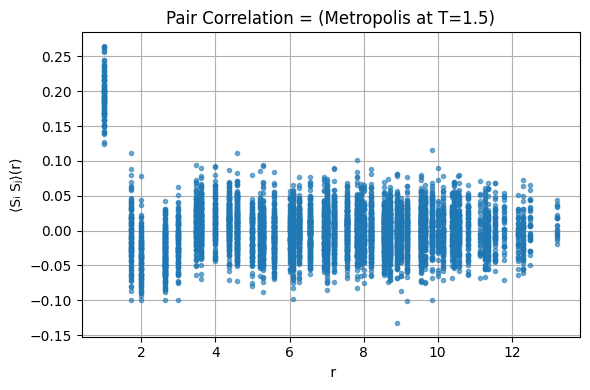

In [7]:

import numpy as np
from lattice import Lattice
from monte_carlo import MonteCarlo
from visualization import Visualization
import matplotlib.pyplot as plt

rows = 20
cols = 20
doping = 0.3      
kf = 1.0           
J0 =- 1.0          
T = 1.5            
steps = 100000       
method = "metropolis"

# --- Lattice + MC initialization ---
lattice = Lattice(rows, cols, doping, kf=kf, J0=J0)
mc = MonteCarlo(lattice)

# --- Run simulation ---
mc.run_loop(steps=steps, T=T, method=method)

# --- Plot averaged pair correlation function ---
r = lattice.r_ij
corr = mc.acc.compute_pair_correlation()

plt.figure(figsize=(6, 4))
plt.plot(r, corr, ".", alpha=0.6)
plt.xlabel(" r")
plt.ylabel("⟨Sᵢ Sⱼ⟩(r)")
plt.title(f"Pair Correlation = ({method.capitalize()} at T={T})")
plt.grid(True)
plt.tight_layout()
plt.show()


(array([ 329.,  323.,  855.,  597., 1120., 1095., 1182.,  762.,  371.,
         152.]),
 array([ 1.        ,  2.22287566,  3.44575131,  4.66862697,  5.89150262,
         7.11437828,  8.33725393,  9.56012959, 10.78300524, 12.0058809 ,
        13.22875656]),
 <BarContainer object of 10 artists>)

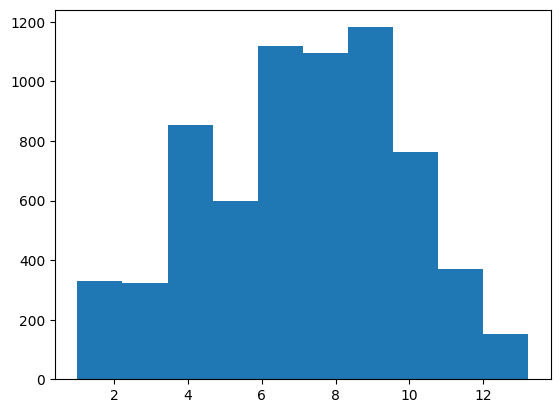

In [10]:
plt.hist(r)